# Homework 1

This notebook provides some skeleton code to get you started on the homework.  Add in your own code and markdown cells  to answer the homework questions.  If you want to submit the notebook as a PDF, make sure your code and markdowns are clear and concise to make grading easy for the TAs.  
This notebook can be opened in Colab
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/zlisto/social_media_analytics/blob/main/HW1.ipynb)

Before starting, select "Runtime->Factory reset runtime" to start with your directories and environment in the base state.

If you want to save changes to the notebook, select "File->Save a copy in Drive" from the top menu in Colab.  This will save the notebook in your Google Drive.


# Clone GitHub Repository
This will clone the repository to your machine.  This includes the code and data files.  Then change into the directory of the repository.

In [ ]:
!git clone https://github.com/zlisto/social_media_analytics

import os
os.chdir("social_media_analytics")

Cloning into 'social_media_analytics'...
remote: Enumerating objects: 660, done.
remote: Counting objects: 100% (225/225), done.
remote: Compressing objects: 100% (143/143), done.
remote: Total 660 (delta 114), reused 191 (delta 81), pack-reused 435
Receiving objects: 100% (660/660), 74.68 MiB | 11.95 MiB/s, done.
Resolving deltas: 100% (346/346), done.
Updating files: 100% (66/66), done.


In [ ]:
!pip install -q -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.1/225.1 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.5/257.5 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not i

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#this option makes it so tweets display nicely in a dataframe
pd.set_option("display.max_colwidth", None)

#this code sets the font sizes for plots
plt.rcParams.update({'axes.labelsize': 18, 'xtick.labelsize': 14, 'ytick.labelsize': 14})




## Problem 1. Keyword Tweets

We will look at a set of tweets based on a keyword search.  

#### 1. (5 points) Load tweets

Load the tweets into a dataframe and call it `df`. The tweets are in the file `"data/HW1_keyword_tweets.csv"`. Print the head of the dataframe.

In [ ]:
fname = 'data/HW1_keyword_tweets.csv'
df = pd.read_csv(fname)
df.head(n=2)

,created_at,screen_name,text,lang,retweet_count,reply_count,like_count,quote_count,id,author_id,conversation_id,in_reply_to_user_id,geo,entities
0,2022-01-22T23:59:33.000Z,None,CD 100% Black 2004 https://t.co/Cqwjuz4YaC\n\n#BitcoinCrash #DragRace #blackmusic #BLACKPINK #BBB22,en,1,0,1,0,1485039462006591490,1444668586623180804,1485039462006591490,NaN,NaN,"{'urls': [{'start': 19, 'end': 42, 'url': 'https://t.co/Cqwjuz4YaC', 'expanded_url': 'https://www.becodorap.eu.org/2021/05/100-black-2004.html?m=1', 'display_url': 'becodorap.eu.org/2021/05/100-bl…'}], 'hashtags': [{'start': 44, 'end': 57, 'tag': 'BitcoinCrash'}, {'start': 58, 'end': 67, 'tag': 'DragRace'}, {'start': 68, 'end': 79, 'tag': 'blackmusic'}, {'start': 80, 'end': 90, 'tag': 'BLACKPINK'}, {'start': 91, 'end': 97, 'tag': 'BBB22'}]}"
1,2022-01-22T23:58:25.000Z,None,One of her best trips in 2021 @ygofficialblink @BLACKPINK #BLACKPINK https://t.co/GeBKiHRo4W,en,0,0,0,0,1485039177435549698,1316852721715015683,1485039177435549698,NaN,NaN,"{'urls': [{'start': 69, 'end': 92, 'url': 'https://t.co/GeBKiHRo4W', 'expanded_url': 'https://twitter.com/kpop_life_girl1/status/1485039177435549698/photo/1', 'display_url': 'pic.twitter.com/GeBKiHRo4W'}], 'mentions': [{'start': 30, 'end': 46, 'username': 'ygofficialblink', 'id': '878204370403250176'}, {'start': 47, 'end': 57, 'username': 'BLACKPINK', 'id': '1273850774380883975'}], 'hashtags': [{'start': 58, 'end': 68, 'tag': 'BLACKPINK'}]}"


#### 2. (4 points) Guess the keyword

Print out a random sample of five tweets.  Print out what your guess is for the keyword these tweets are based on.

In [ ]:
df[ ['screen_name','text']].sample(n=5)
#Keyword = Blackpink

,screen_name,text
3224,None,BLACKPINK’s Jennie's Squishy White Bag Is Sold Out\n\n#BLACKPINK #JENNIE #blinks #EntertainmentNews #KoreanUpdates\nhttps://t.co/SDIFM4tL7D
18477,441Txt,Happy birthday baby😩💖#JENNIE #BLACKPINK #HappyJennieDay https://t.co/wRnC0yft1T
6637,None,@soompi #SNOWDROP \nme and people want ako awww\n#BLACKPINK \n#JISOO
1741,None,@thetop_100 I Nominate #JENNIE #BLACKPINK for #THE100MostBeautifulKPOPFaces #thetop_100 \n\n3
7364,None,"#Beyonce wished birthday to #JENNIE &amp; #JISOO. Does it mean #BLACKPINK will collab with her this year? Or she just wished them like normal person?\n\n*actually I want @arianagrande collab with blackpink 1ˢᵗ, but it this year is beyoncé’s year, still enjoy it cause shems my fav 😘!"


#### 3. (10 points) Searching the tweets

Find all tweets that contain the word "beautiful". Print out a random sample of the **screen name, text, and retweet** count of five of these tweets (this means select the appropriate columns and print your sample tweets)



In [ ]:
# prompt: Find all tweets that contain the word "beautiful. Print out a random sample of the screen name, text, and retweet count of 5 of these tweets

df_beautiful = df[df['text'].str.contains('beautiful')]
df_beautiful[['screen_name','text','retweet_count']].sample(n=5)


,screen_name,text,retweet_count
14929,ChaelisaNews,My 'LALISA' Photobook (Special Edition) has arrived!! Its so beautiful and HUGE 😭\n\n블랙핑크 리사 | #LISA #리사 #LALISA #BLACKPINK #블랙핑크 @BLACKPINK https://t.co/30v8z1TPul,15
11953,Gayforrosie_97,The two most beautiful girls I've ever seen ❤️❤️\n#chaelisa #LISA #ROSE #BLACKPINK #BLINK https://t.co/VhGfVJkS7y,0
10264,djiarys,kim RT WORLDMUSICAWARD: #BLACKPINK's #LISA shares beautiful flashback pics from 2021!📸✨🌟🔥👑💛 BLACKPINK \nhttps://t.co/kYqCcPKCYy https://t.co/lUMNivu9MX…,0
12770,trust_fated,BLACKPINK in your area... 💗\n.\n.\n.\n.\n.\n.\n#BLACKPINK #rose #blink\n#art #artist #love #photography #drawing #artwork #instagood #photooftheday #instagram #like #fashion #beautiful #follow #painting #picoftheday #digitalart #Bangladesh https://t.co/3s2E9xiMB2,0
6175,None,"RT WORLDMUSICAWARD: #Beyoncé shared the cutest baby pic of #BLACKPINK's beautiful #Jennie, wishing her happy birthday in her special list… park",0


#### 4.  (2 points) Count tweets

How many tweets contain the word "beautiful"?



In [ ]:
# prompt: Find how many tweets contain the word "beautiful" in this dataset

num_beautiful_tweets = len(df_beautiful)
print(f"Number of tweets containing the word 'beautiful': {num_beautiful_tweets}")


Number of tweets containing the word 'beautiful': 240


#### 5.  (10 points) Sort the tweets

Sort the tweets by like count. Print out the `like_count`, `screen name`, and `text`  of the top five tweets in descending order (only print these three columns).



In [ ]:
cols  =['like_count','screen_name','text']
df.sort_values(by = ['like_count'], ascending = False)[cols].head(n=5)

,like_count,screen_name,text
19318,15715,LISANATIONS_,#LISA ranks #1 (+2) on the January 2022 Individual Girl Group Member Brand Reputation!\n\n블랙핑크 리사 #리사 #BLACKPINK #블랙핑크 #LALISA @BLACKPINK https://t.co/JwwRnHh3dr
9268,15715,None,#LISA ranks #1 (+2) on the January 2022 Individual Girl Group Member Brand Reputation!\n\n블랙핑크 리사 #리사 #BLACKPINK #블랙핑크 #LALISA @BLACKPINK https://t.co/JwwRnHh3dr
18212,15600,soompi,"#BLACKPINK's #Jisoo And #JungHaeIn Share A Quiet Moment Together In ""#Snowdrop""\nhttps://t.co/7DT273GT9k https://t.co/yCWQEaxL8K"
8162,15600,None,"#BLACKPINK's #Jisoo And #JungHaeIn Share A Quiet Moment Together In ""#Snowdrop""\nhttps://t.co/7DT273GT9k https://t.co/yCWQEaxL8K"
9933,12418,None,"Happy Birthday to #BLACKPINK's gorgeous, hugely talented, Global Superstar #JENNIE! 👏💐‍👩‍🎤‍🎂🎁🎉🎇👑❤️ #HappyJennieDay #OurStarJennieDay #HappyBirthdayJennie @BLACKPINK \nhttps://t.co/voIKiI1GUN https://t.co/msEwxyDK7x"


#### 6.  (10 points) Like count means

What is the mean like count of all of the tweets?  
What is the mean like count of tweets that contain the word "beautiful" (this is a bit tricky)?

Make sure you print out your answers.




In [ ]:
# prompt: print the mean to two decimal figures

mean_like_count = df['like_count'].mean()
mean_like_count_beautiful = df_beautiful['like_count'].mean()

print(f"Mean like count of all tweets: {mean_like_count:.2f}")
print(f"Mean like count of tweets containing the word 'beautiful': {mean_like_count_beautiful:.2f}")


Mean like count of all tweets: 67.08
Mean like count of tweets containing the word 'beautiful': 136.69


## Problem 2.  User Profiles

In this question we will analyze some Twitter user profiles.

#### 1. (5 points) Load profiles

Load the profiles into a dataframe and call it `df_u`. The tweets are in the file `"data/HW1_profiles.csv"`.  Print the head of the dataframe.

In [ ]:
fname2 = 'data/HW1_profiles.csv'
df_u = pd.read_csv(fname2)
df_u.head(n=2)

,created_at,name,username,description,id,location,followers_count,following_count,listed_count,tweet_count
0,2020-01-06T20:00:33.000Z,gigi de sofie ♡,yoongisgrlx,- jisoo’s 여자 친구,1214275543010406400,She/they,121,481,1,6918
1,2021-01-26T20:39:16.000Z,LISA_babe,Laura22050742,i stan Lisa 🖤💕,1354166921776619521,NaN,4,41,0,849


#### 2. (10 points)   Follower count and profiles

What is the mean follower count of all users?

What is the mean follower count of all users whose profile description (column is called `"description"`) contains the word "love"?

Print out your answers.

In [ ]:
mean_followers_count = df_u['followers_count'].mean()
mean_follower_count_love = df_u[df_u['description'].str.contains('love', na=False)]['followers_count'].mean()

print(f"Mean follower count of all tweets: {mean_followers_count:.2f}")
print(f"Mean follower count of tweets containing the word 'love': {mean_follower_count_love:.2f}")

Mean follower count of all tweets: 413.28
Mean follower count of tweets containing the word 'love': 2271.25


# Problem 3. User Tweets

#### 1. (5 points) Load user tweets

Load the user tweets into a dataframe and call it `df_ut`. The tweets are in the file `"data/HW1_user_tweets.csv"`.  Print a random sample of five tweets from the dataframe.

In [ ]:
fname3 = 'data/HW1_user_tweets.csv'
df_ut = pd.read_csv(fname3)
df_ut.head(n=5)

,created_at,screen_name,text,lang,retweet_count,reply_count,like_count,quote_count,id,author_id,conversation_id,in_reply_to_user_id,geo
0,2022-01-24T00:58:34.000Z,foxnews,Biden weighs sending thousands of troops to counter Russia https://t.co/bKdB5WqMvA,en,205,882,475,148,1485416702527614976,1367531,1485416702527614976,NaN,None
1,2022-01-24T00:53:50.000Z,foxnews,RT @foxweather: Florida freeze: Temperatures to drop overnight in parts of the Sunshine State https://t.co/UeYFTqfjHQ #FLwx https://t.co/VV…,en,26,0,0,0,1485415510900629504,1367531,1485415510900629504,NaN,None
2,2022-01-24T00:41:43.000Z,foxnews,CAT AND MOUSE: China taunts US Navy with largest show of force in months https://t.co/ZJMzLgCOG6,en,175,172,316,35,1485412461167661056,1367531,1485412461167661056,NaN,None
3,2022-01-24T00:30:05.000Z,foxnews,"Voters sound off on 'insane' state of economy under Biden, say he's 'listening to too many liberals' https://t.co/BkUO1YEWeI",en,126,171,685,12,1485409536835932163,1367531,1485409536835932163,NaN,None
4,2022-01-24T00:03:17.000Z,foxnews,GET OUT NOW: US issues dire warning to Americans in Ukraine as fears over war with Russia grow on world stage https://t.co/OjJswv6i0G,en,186,189,399,38,1485402790096777219,1367531,1485402790096777219,NaN,None


#### 2. ( 6 points) Mean like count

Calculate the mean like count of each user in the user tweets dataset.  Use the `groupby` function.


In [ ]:
# prompt: Calculate the mean like count of each user in the user tweets dataset. Use the groupby function.

df_ut.groupby('screen_name')['like_count'].mean()


screen_name
foxnews     386.168
nytimes     530.436
politico     63.126
Name: like_count, dtype: float64

#### 3. ( 9 points) Barplot of like counts

Make a bar plot of the like counts of each user.  Be sure to put nice, easy to read labels on the axes and a descriptive title on the plot.  For full credit, make it look like the plot in lecture.


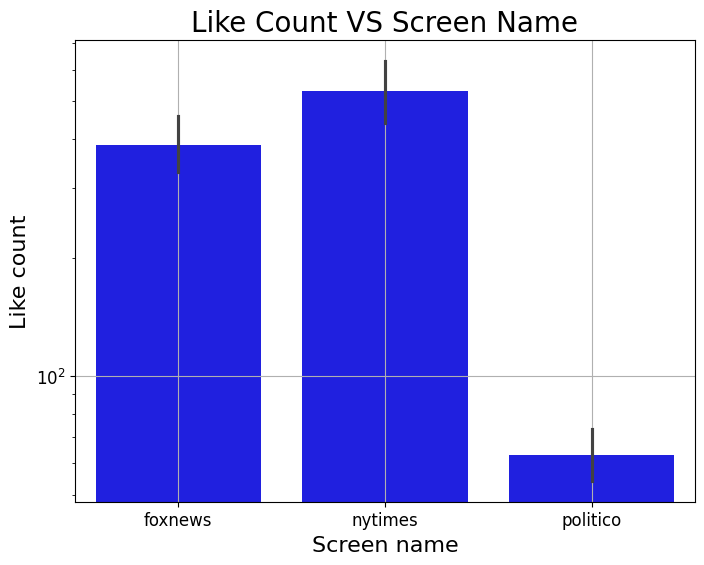

In [ ]:
fig = plt.figure(figsize = (8,6))
sns.barplot(data = df_ut, x = 'screen_name', y = 'like_count', color = "blue")
plt.xlabel('Screen name', fontsize = 16)
plt.ylabel('Like count', fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title("Like Count VS Screen Name", fontsize = 20)
plt.grid()
plt.yscale("log")
plt.show()

#### 4. ( 6 points) Ratioed

A tweet is said to be "ratioed" when it has more replies than likes.  Add a column to the user tweets dataframe called `"ratio"` that is equal to the reply count divided by the like count.
Use the `describe` function to print out the summary statistics of the `"ratio"` column.

Check here for help: https://www.datasciencelearner.com/divide-two-columns-in-pandas-methods/#:~:text=The%20second%20method%20to%20divide,division%20is%20done%20column%2Dwise.

In [ ]:
# prompt: Add a column to the user tweets dataframe called "ratio" that is equal to the reply count divided by the like count. Use the describe function to print out the summary statistics of the "ratio" column.

df_ut['ratio'] = df_ut['reply_count'] / df_ut['like_count']
df_ut['ratio'].describe()


count    2635.000000
mean        0.406735
std         0.494196
min         0.000000
25%         0.140478
50%         0.262443
75%         0.491004
max         8.000000
Name: ratio, dtype: float64

#### 5. ( 9 points) Ratio Boxplot

A boxplot shows the quantile values of data. Make a boxplot of the `"ratio"` column versus `"screen_name"` using the `boxplot` function in Seaborn.  This is similar to the `barplot` function you learned in class.   Be sure to put nice, easy to read labels on the axes and a descriptive title on the plot.

Details on the `boxplot` function are here:  https://pythonbasics.org/seaborn-boxplot/


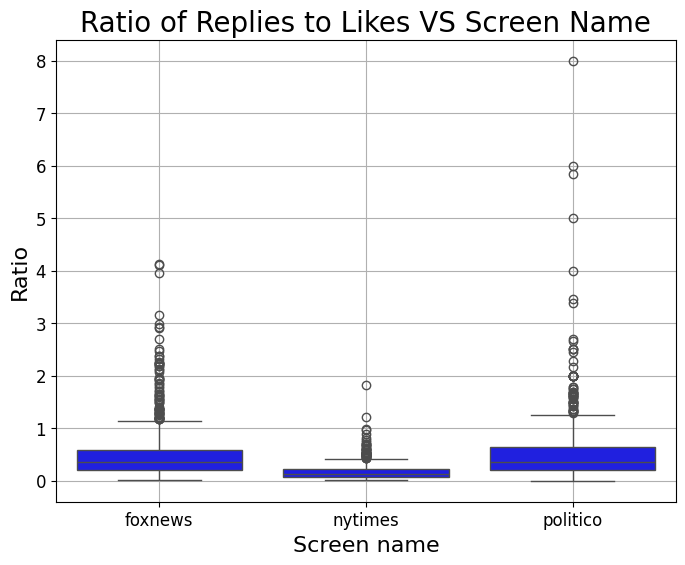

In [ ]:
# prompt: Make a boxplot of the "ratio" column versus "screen_name" using the boxplot function in Seaborn

import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,6))
sns.boxplot(data = df_ut, x = 'screen_name', y = 'ratio', color = "blue")
plt.xlabel('Screen name', fontsize = 16)
plt.ylabel('Ratio', fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title("Ratio of Replies to Likes VS Screen Name", fontsize = 20)
plt.grid()
plt.show()


#### 6. ( 9 points) Most Ratioed Tweet

Print out the screen name, ratio, reply count, like count, and text of the five tweets with the highest value of the ratio.


In [ ]:
# prompt: Print out the screen name, ratio, reply count, like count, and text of the five tweets with the highest value of the ratio.

df_ut.sort_values(by='ratio', ascending=False)[['screen_name', 'ratio', 'reply_count', 'like_count', 'text']].head(5)


,screen_name,ratio,reply_count,like_count,text
2872,politico,8.000000,8,1,"Go behind-the-scenes on Capitol Hill with @ktullymcmanus! Subscribe to Huddle for scoops on the maneuvering, policy initiatives, and power players making waves in Congress. Start reading today. \nhttps://t.co/dfpSNWPYfR https://t.co/Ue9q4l8pOB"
2200,politico,6.000000,6,1,Subscribe to West Wing Playbook to get daily scoops and nuggets from inside the White House and across the Cabinet. Don't miss out.\nhttps://t.co/AsF2TXHAuK https://t.co/GKgMuibZZ2
2459,politico,5.846154,1748,299,"He voted with Donald Trump most of the time but isn’t a loyalist. He’s a stalwart conservative willing to criticize other conservatives.\n\nRep. Dan Crenshaw, in short, is a GOP anomaly.\n\nhttps://t.co/5QCegzQSjt"
2805,politico,5.000000,5,1,Start your day with POLITICO Playbook for the insider nuggets and scoops you need to know from Washington. Subscribe today.\nhttps://t.co/Ceig2eRhJ2 https://t.co/RG6R5Knezg
975,foxnews,4.132353,281,68,"NFL has 1 Black head coach after Texans fire David Culley, league faces social media firestorm https://t.co/IUnVGx23b5"
